In [9]:
import pathlib
from datetime import datetime

from astropy.table import Table
from astropy.table import Column
from astropy.time import Time
import astropy.coordinates as coord
import astropy.units as u


import numpy as np

# Set up matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

%matplotlib inline

# See https://mpld3.github.io/quickstart.html !!

# or https://docs.bokeh.org/en/latest/
# https://docs.bokeh.org/en/latest/docs/user_guide/quickstart.html#userguide-quickstart


from bokeh.plotting import figure, output_file, output_notebook, show
from bokeh.models import Legend, ColumnDataSource, HoverTool

from bokeh.sampledata.stocks import AAPL
import pandas

In [ ]:

# prepare some data
N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
]

# output to static HTML file (with CDN resources)
#output_file("color_scatter.html", title="color_scatter.py example", mode="cdn")
output_notebook()

TOOLS = "crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select"

# create a new plot with the tools above, and explicit ranges
p = figure(tools=TOOLS, x_range=(0, 100), y_range=(0, 100))

# add a circle renderer with vectorized colors and sizes
p.circle(x, y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)

# show the results
show(p)

In [ ]:


# prepare some data
aapl = np.array(AAPL['adj_close'])
aapl_dates = np.array(AAPL['date'], dtype=np.datetime64)

window_size = 30
window = np.ones(window_size)/float(window_size)
aapl_avg = np.convolve(aapl, window, 'same')

# output to static HTML file
#output_file("stocks.html", title="stocks.py example")
output_notebook()

# create a new plot with a datetime axis type
p = figure(plot_width=800, plot_height=350, x_axis_type="datetime")

# add renderers
p.circle(aapl_dates, aapl, size=4, color='darkgrey', alpha=0.2, legend_label='close')
p.line(aapl_dates, aapl_avg, color='navy', legend_label='avg')

# NEW: customize by setting attributes
p.title.text = "AAPL One-Month Average"
p.legend.location = "top_left"
p.grid.grid_line_alpha = 0
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Price'
p.ygrid.band_fill_color = "olive"
p.ygrid.band_fill_alpha = 0.1

# show the results
show(p)

In [ ]:
data_dir = pathlib.Path('/Users/donald/Box Sync/navo_stats')
#file = 'ps_cone_1000_2019-04-14.csv'
file = 'ps_cone-2019-07-15-23:37.csv'
path = data_dir / file

# Read csv into Table
old_data = Table.read(path, format='ascii.csv')
data = old_data

In [2]:
data_dir = pathlib.Path('/Users/donald/Box Sync/navo_stats')
file = 'ps_cone-2019-11-12-13-58.csv'
path = data_dir / file

# Read csv into Table
medium_data = Table.read(path, format='ascii.csv')
data = medium_data

In [48]:

# output to static HTML file
#output_file("stocks.html", title="stocks.py example")
output_notebook()

# create a new plot with a datetime axis type
p = figure(plot_width=500, plot_height=500)

data["num_rows"] = data["num_rows"].astype(float)  # Gets rid of the warning when implicitly converted for Pandas
df = data["int0_duration", "int1_duration", "num_rows"].to_pandas().copy()

# add renderers
qt_rend = p.circle(df["int0_duration"], df["num_rows"], size=4, color='red', alpha=0.2)
dt_rend = p.circle(df["int1_duration"], df["num_rows"], size=4, color='green', alpha=0.2)

legend = Legend(items=[
    ("Query Time",   [qt_rend]),
    ("Download Time", [dt_rend])
], location=(0, 40), click_policy='hide')
p.add_layout(legend, 'below')

# NEW: customize by setting attributes
p.title.text = "Times versus # of Result Rows"
#p.grid.grid_line_alpha = 0
p.xaxis.axis_label = 'Duration (sec)'
p.yaxis.axis_label = '# of Rows'
#p.ygrid.band_fill_color = "olive"
#p.ygrid.band_fill_alpha = 0.05


# show the results
show(p)

Loading BokehJS ...

In [3]:

# output to static HTML file
#output_file("stocks.html", title="stocks.py example")
output_notebook()

# create a new plot with a datetime axis type
p = figure(plot_width=500, plot_height=500)

data["num_rows"] = data["num_rows"].astype(float)  # Gets rid of the warning when implicitly converted for Pandas
df = data["int0_duration", "int1_duration", "num_rows", "base_name", "service_type",
          "RA", "DEC", "SR"].to_pandas().copy()
source = ColumnDataSource(df)

# add renderers
qt_rend = p.circle(x="int0_duration", y="num_rows", source=source, size=4, color='red', alpha=0.2)
dt_rend = p.circle(x="int1_duration", y="num_rows", source=source, size=4, color='green', alpha=0.2)

legend = Legend(items=[
    ("Query Time",   [qt_rend]),
    ("Download Time", [dt_rend])
], location=(0, 40), click_policy='hide')
p.add_layout(legend, 'below')

hover = HoverTool(tooltips=[
    ("Name", "@base_name"),
    ("Service Type", "@service_type"),
    ("RA", "@RA"),
    ("Dec", "@DEC"),
    ("Radius", "@SR")
])
p.add_tools(hover)

# NEW: customize by setting attributes
p.title.text = "Times versus # of Result Rows"
#p.grid.grid_line_alpha = 0
p.xaxis.axis_label = 'Duration (sec)'
p.yaxis.axis_label = '# of Rows'
#p.ygrid.band_fill_color = "olive"
#p.ygrid.band_fill_alpha = 0.05


# show the results
show(p)

# Todo
# - Put base name and service type in title
# - Put start time rows and duration in tooltip
# - Do similar thing for vs. radius plot
# - Do time plot
# - Put them all in a web page


Loading BokehJS ...

In [36]:

# output to static HTML file
#output_file("stocks.html", title="stocks.py example")
output_notebook()

# create a new plot with a datetime axis type
p = figure(plot_width=700, plot_height=500, x_axis_type="datetime")

data["num_rows"] = data["num_rows"].astype(float)  # Gets rid of the warning when implicitly converted for Pandas
df = data["start_time", "int0_duration", "int1_duration", "num_rows", "base_name", "service_type",
          "RA", "DEC", "SR"].to_pandas().copy()
df["dt_start_time"] = pandas.to_datetime(df["start_time"], format='%Y-%m-%d-%H:%M:%S.%f')

source = ColumnDataSource(df)

# add renderers
qt_rend = p.circle(x="dt_start_time", y="int0_duration", source=source, size=4, color='red', alpha=0.2)

hover = HoverTool(
    tooltips=[
        ("RA", "@RA"),
        ("Dec", "@DEC"),
        ("Radius", "@SR"),
        ("Query Time", "@int0_duration"),
        ("Download Time", "@int1_duration"),
        ("# of Rows", "@num_rows"),
        ("Start Time", "@dt_start_time{%Y-%m-%d-%H:%M:%S}")
    ],
    formatters={
        'dt_start_time': 'datetime'
    }
                
                 )
p.add_tools(hover)

# NEW: customize by setting attributes
p.title.text = "Query Time Over Time"
p.xaxis.axis_label = 'Start Time'
p.yaxis.axis_label = 'Query Time (s)'


# show the results
show(p)

Loading BokehJS ...

In [17]:
display(df)


,start_time,int0_duration,int1_duration,num_rows,base_name,service_type,RA,DEC,SR,dt_start_time
0,2019-11-12-13:59:03.402352,51.022421,2.820158,28278.0,PanSTARRS,xcone,72.437862,31.463439,0.142364,2019-11-12 13:59:03.402352
1,2019-11-12-13:59:47.578625,31.686787,5.068552,33688.0,PanSTARRS,xcone,128.031559,-26.374745,0.184046,2019-11-12 13:59:47.578625
2,2019-11-12-14:00:12.592221,8.877765,12.666534,41748.0,PanSTARRS,xcone,212.570373,-11.332161,0.207974,2019-11-12 14:00:12.592221
3,2019-11-12-14:00:39.568453,0.075094,0.012853,0.0,PanSTARRS,xcone,321.990048,-67.057840,0.131276,2019-11-12 14:00:39.568453
4,2019-11-12-14:00:54.831049,15.217680,5.416119,45874.0,PanSTARRS,xcone,123.171713,38.326036,0.200688,2019-11-12 14:00:54.831049
...,...,...,...,...,...,...,...,...,...,...
135,2019-11-12-15:56:45.008005,35.122500,1.380203,4567.0,PanSTARRS,xcone,0.494645,-20.125498,0.080663,2019-11-12 15:56:45.008005
136,2019-11-12-15:57:37.874234,49.930666,1.612734,6052.0,PanSTARRS,xcone,78.744318,34.878666,0.071973,2019-11-12 15:57:37.874234
137,2019-11-12-15:57:51.918100,10.480056,0.010076,0.0,PanSTARRS,xcone,293.629332,-76.991782,0.091657,2019-11-12 15:57:51.918100
138,2019-11-12-15:58:45.778487,53.805599,0.836008,6738.0,PanSTARRS,xcone,174.118542,-2.552034,0.103355,2019-11-12 15:58:45.778487


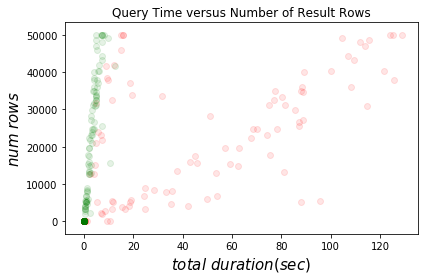

In [47]:
fig, ax = plt.subplots()

size = data["num_rows"] / 500
ax.scatter(data["int0_duration"], data["num_rows"], c='red', alpha=0.1)
ax.scatter(data["int1_duration"], data["num_rows"], c='green', alpha=0.1)

ax.set_xlabel("$total\ duration (sec)$", fontsize=15)
ax.set_ylabel("$num\ rows$", fontsize=15)
ax.set_title('Query Time versus Number of Result Rows')

#ax.grid(True)
fig.tight_layout()

plt.show()

In [ ]:
fig, ax = plt.subplots()

size = data["num_rows"] / 500
ax.scatter(data["int0_duration"], data["SR"], c='red', alpha=0.1)
ax.scatter(data["int1_duration"], data["SR"], c='green', alpha=0.1)

ax.set_xlabel("$total\ duration (sec)$", fontsize=15)
ax.set_ylabel("$query\ radius (deg)$", fontsize=15)
ax.set_title('Query Time versus Radius')

#ax.grid(True)
fig.tight_layout()

plt.show()

In [ ]:
def convert_date_string(date_string):
    dt = datetime.strptime(date_string, '%Y-%m-%d-%H:%M:%S.%f')
    new_string = dt.strftime('%Y-%m-%dT%H:%M:%S.%f')
    return new_string

/Users/donald/anaconda3/envs/basic_plots/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


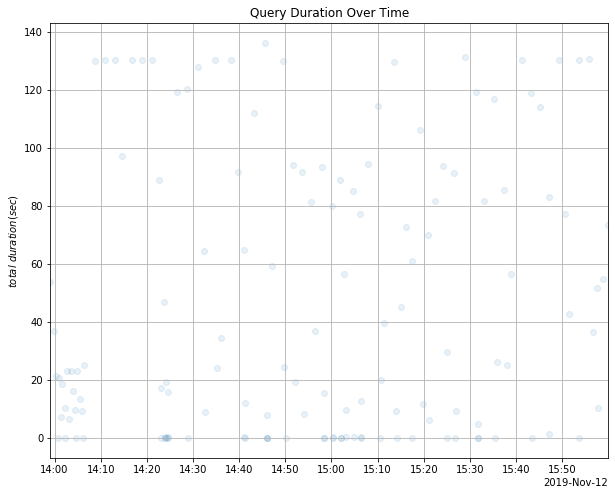

In [4]:

#short_data = data[0:500]
short_data = data
dts = [datetime.strptime(dt, '%Y-%m-%d-%H:%M:%S.%f') for dt in short_data['start_time']]

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(dts, short_data["int0_duration"] + short_data["int1_duration"], alpha=0.1)

ax.set_ylabel("$total\ duration (sec)$")

# format the ticks
locator = mdates.AutoDateLocator(minticks=10, maxticks=20)
#locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.set_xlim(dts[0], dts[-1])
ax.set_title('Query Duration Over Time')

ax.grid(True)
#fig.autofmt_xdate()

plt.show()

In [27]:
import pandas as pd
from bokeh.models import HoverTool
from bokeh.models.formatters import DatetimeTickFormatter
from bokeh.plotting import figure, output_notebook, show
import math

output_notebook()

p = figure(plot_width=400, plot_height=400, x_axis_type="datetime")


d = {
    'timestamp_micros': [1530479286336096,1530479286362156,1530479286472230,1530479286488213,1530479286495292], 
    'height': [6, 7, 2, 4, 5],
    'info': ['foo','bar','baz','qux','quux'],
}
df = pd.DataFrame(data=d)
df['date_time'] = pd.to_datetime(df['timestamp_micros'], unit='us')
display(df)


p.circle(x='date_time', y='height', source=df, line_width=2, size=15, color="navy", alpha=0.5)
p.line(x='date_time', y='height', source=df, line_width=2, color="navy", alpha=0.5)

hover = HoverTool(
    tooltips = [
        ("Date", "@date_time{%Y-%m-%d %H:%M:%S.%3N}"),
        ("Value", "@height{%0.000000f}"),
        ("info", "@info"),
    ],
    formatters={
        'date_time': 'datetime',
        'height' : 'printf',
    }
)
p.add_tools(hover)

p.xaxis.formatter=DatetimeTickFormatter(
    microseconds = ['%Y-%m-%d %H:%M:%S.%f'],
    milliseconds = ['%Y-%m-%d %H:%M:%S.%3N'],
    seconds = ["%Y-%m-%d %H:%M:%S"],
    minsec = ["%Y-%m-%d %H:%M:%S"],
    minutes = ["%Y-%m-%d %H:%M:%S"],
    hourmin = ["%Y-%m-%d %H:%M:%S"],
    hours=["%Y-%m-%d %H:%M:%S"],
    days=["%Y-%m-%d %H:%M:%S"],
    months=["%Y-%m-%d %H:%M:%S"],
    years=["%Y-%m-%d %H:%M:%S"],
)
p.xaxis.major_label_orientation = 3*math.pi/8

show(p)


Loading BokehJS ...

,timestamp_micros,height,info,date_time
0,1530479286336096,6,foo,2018-07-01 21:08:06.336096
1,1530479286362156,7,bar,2018-07-01 21:08:06.362156
2,1530479286472230,2,baz,2018-07-01 21:08:06.472230
3,1530479286488213,4,qux,2018-07-01 21:08:06.488213
4,1530479286495292,5,quux,2018-07-01 21:08:06.495292
